# K Means Evaluation

This notebooks serves as an explanatory notebook for k means evaluation.
- First, two data sets are introduced.
- Next, evaluation metric from sklearn k means model is introduced.
- Finally, the elbow method is introduced on generated data sets.

# GENERAL SETTINGS --------------------------------------

## Initial Timestamp

In [1]:
import time
print("Date and Time of Starting Execution: " + time.strftime("%d/%m/%Y") + " " +time.strftime("%X"))

global_start_time = time.time()

Date and Time of Starting Execution: 26/12/2021 17:09:33


## Libraries

In [2]:
#general libraries
from typing import Optional
from numpy import array, random, concatenate, argmin
from typing import List, Tuple, Optional, Any
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [3]:
#personal libraries
from Code.Visualization import Visualizer

## Notebook Settings

In [4]:
SEED_FOR_DATA = 540924
N_FOR_SIMULATION = 20
SEED_FOR_K_MEANS = 398

# ANALYSIS ---------------------------------------------------------

## Data

In this part, the function for data generation is created.

> **HINT:** We are generating random data. For preserving the reproducibility principle, use predefined seeds.

### Function

In [5]:
def generate_data_one_cluster(n_of_obs: int, seed: Optional[int] = None) -> array:
    """
    Generates data for simulation. One cluster generated out of normal distribution with
    n_of_obs observation.
    :param n_of_obs: int. Number of observation in each class.
    :param seed: Optional[int]. If int, then used as a seed in random generation.
    :return: np.array. Data.
    """
    if seed is not None:
        random.seed(seed)
    x = random.normal(0, 1, n_of_obs)
    y = random.normal(0, 1, n_of_obs)
    X = array([x, y]).transpose()

    return X

In [6]:
def generate_data_three_clusters(n_of_obs_in_class: int, seed: Optional[int] = None) -> array:
    """
    Generates data for simulation. Three clusters generated out of normal distribution with
    n_of_obs_in_class observation in each.
    :param n_of_obs_in_class: int. Number of observation in each class.
    :param seed: Optional[int]. If int, then used as a seed in random generation.
    :return: np.array. Data.
    """
    if seed is not None:
        random.seed(seed)
    x = concatenate((
        random.normal(0, 1, n_of_obs_in_class),
        random.normal(5, 1, n_of_obs_in_class),
        random.normal(-5, 1, n_of_obs_in_class)
    ))
    y = concatenate((
        random.normal(0, 1, n_of_obs_in_class),
        random.normal(5, 1, n_of_obs_in_class),
        random.normal(-5, 1, n_of_obs_in_class)
    ))
    X = array([x, y]).transpose()

    return X

### Generating and Plotting Data

[[ 2.22976966  0.58964957]
 [ 0.39518006 -0.73957198]
 [-1.2517885   0.306768  ]
 [-1.82937349 -0.42659246]
 [-0.04780692  0.29312142]]


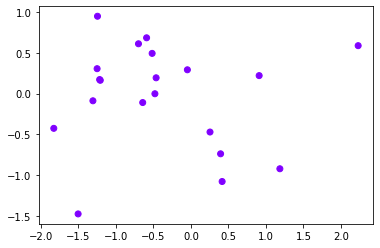

In [7]:
#setting seed and number of observations.
data_seed = SEED_FOR_DATA
n = N_FOR_SIMULATION

#generating and plotting data
X_one_cluster = generate_data_one_cluster(n_of_obs=n, seed=data_seed)
print(X_one_cluster[0:5,:])
visu = Visualizer()
visu.plot_clusters(X_one_cluster[:,0], X_one_cluster[:,1], [1]*X_one_cluster.shape[0])

[[ 2.22976966 -0.08608874]
 [ 0.39518006  0.43628543]
 [-1.2517885  -0.79917057]
 [-1.82937349  0.13526985]
 [-0.04780692 -0.95579236]]


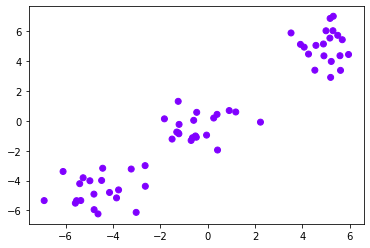

In [8]:
#setting seed and number of observations.
data_seed = SEED_FOR_DATA
n = N_FOR_SIMULATION

#generating and plotting data
X_three_clusters = generate_data_three_clusters(n_of_obs_in_class=n, seed=data_seed)
print(X_three_clusters[0:5,:])
visu = Visualizer()
visu.plot_clusters(X_three_clusters[:,0], X_three_clusters[:,1], [1]*X_three_clusters.shape[0])

## Model

[scikit-learn k-means documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Metric

In [9]:
k = N_FOR_SIMULATION

kmeans_model = KMeans(n_clusters = k, random_state=SEED_FOR_K_MEANS)
kmeans_model.fit(X_one_cluster)
kmeans_model.inertia_

0.0

In [10]:
k = int(N_FOR_SIMULATION / 2)

kmeans_model = KMeans(n_clusters = k, random_state=SEED_FOR_K_MEANS)
kmeans_model.fit(X_one_cluster)
kmeans_model.inertia_

0.6182839720362244

In [11]:
k = 1

kmeans_model = KMeans(n_clusters = k, random_state=SEED_FOR_K_MEANS)
kmeans_model.fit(X_one_cluster)
kmeans_model.inertia_

27.876648560461135

### Elbow Method

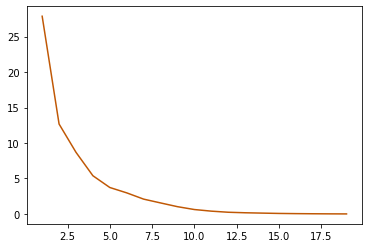

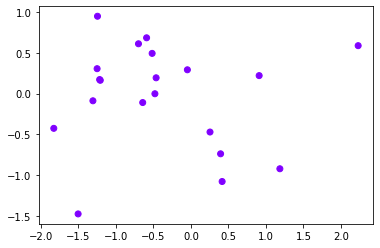

In [12]:
#choosing the data
X = X_one_cluster

#running computation
k_params = range(1, N_FOR_SIMULATION)
metrics = [0]  * len(k_params)
i=0
for k in k_params:
    kmeans_model = KMeans(n_clusters = k, random_state=SEED_FOR_K_MEANS)
    kmeans_model.fit(X)
    metrics[i]=kmeans_model.inertia_
    i=i+1

visu.plot_metric(k_params, metrics)
visu.plot_clusters(X_one_cluster[:,0], X_one_cluster[:,1], [1]*X_one_cluster.shape[0])

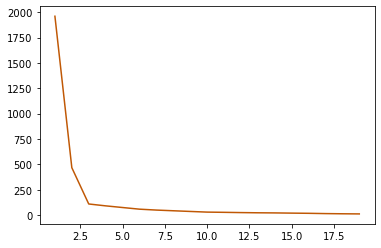

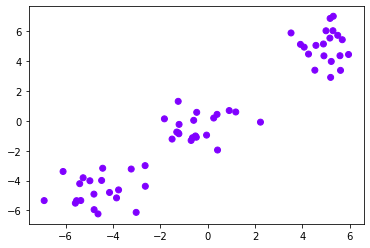

In [13]:
#choosing the data
X = X_three_clusters

#running computation
k_params = range(1, N_FOR_SIMULATION)
metrics = [0]  * len(k_params)
i=0
for k in k_params:
    kmeans_model = KMeans(n_clusters = k, random_state=SEED_FOR_K_MEANS)
    kmeans_model.fit(X)
    metrics[i]=kmeans_model.inertia_
    i=i+1

visu.plot_metric(k_params, metrics)
visu.plot_clusters(X_three_clusters[:,0], X_three_clusters[:,1], [1]*X_three_clusters.shape[0])

## Final Timestamp

In [14]:
print("Date and Time of Ending Execution: " + time.strftime("%d/%m/%Y") + " " +time.strftime("%X"))
print("Time duration of whole notebook is: " + str(round((time.time() - global_start_time)/60, 3)) + " seconds")

Date and Time of Ending Execution: 26/12/2021 17:09:36
Time duration of whole notebook is: 0.04 seconds
